In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [73]:
# Собираем все данные
files = Path("/vcfs/genomes/original/results").glob("*.txt")

In [74]:
print(files)

<generator object Path.glob at 0x7f3efc1fb230>


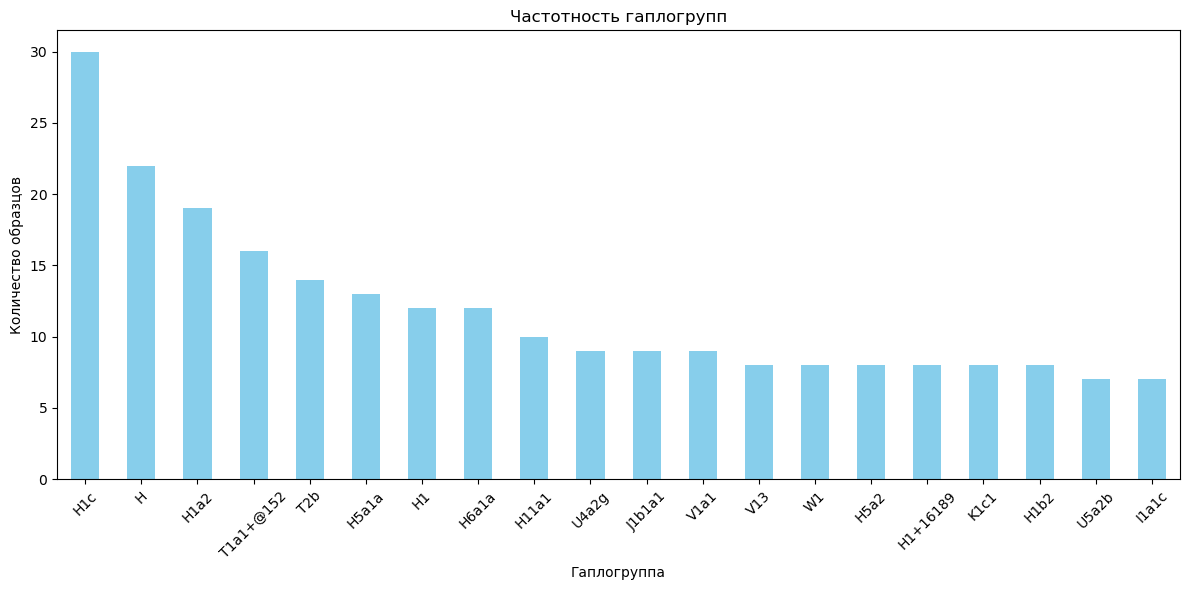

In [75]:
df = pd.concat([pd.read_csv(f, sep='\t') for f in files])

# Считаем частотность гаплогрупп
haplo_counts = df['Haplogroup'].value_counts().head(20)  # Топ-20

# Рисуем график
plt.figure(figsize=(12, 6))
haplo_counts.plot(kind='bar', color='skyblue')
plt.title("Частотность гаплогрупп")
plt.xlabel("Гаплогруппа")
plt.ylabel("Количество образцов")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

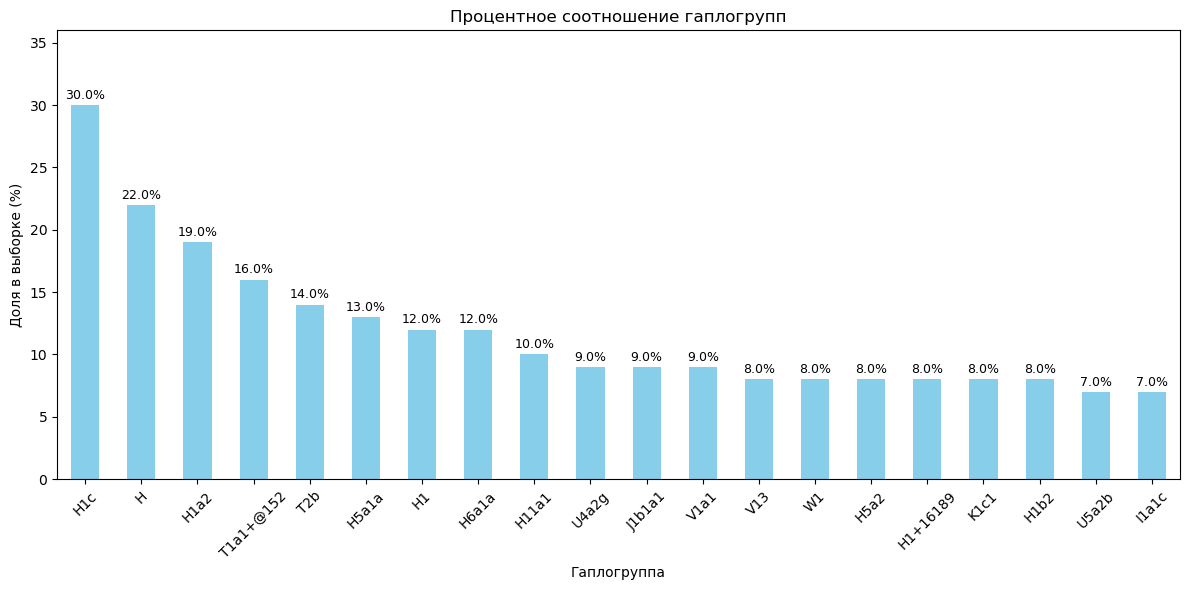

In [76]:
haplo_counts_percent = df['Haplogroup'].value_counts(normalize=True) * 100
haplo_counts_percent = haplo_counts_percent.head(20) 
plt.figure(figsize=(12, 6))
haplo_counts.plot(kind='bar', color='skyblue')

# Добавляем подписи с процентами
for i, v in enumerate(haplo_counts):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=9)

plt.title("Процентное соотношение гаплогрупп")
plt.xlabel("Гаплогруппа")
plt.ylabel("Доля в выборке (%)")
plt.xticks(rotation=45)
plt.ylim(0, haplo_counts.max() * 1.2)  # Оставляем место для подписей
plt.tight_layout()
plt.show()

In [35]:
print(haplo_counts_percent)

Haplogroup
H1c          3.009027
H            2.206620
H1a2         1.905717
T1a1+@152    1.604814
T2b          1.404213
               ...   
H5a5         0.100301
T1a1i        0.100301
HV1a         0.100301
U4a2a1       0.100301
T2c1         0.100301
Name: proportion, Length: 367, dtype: float64


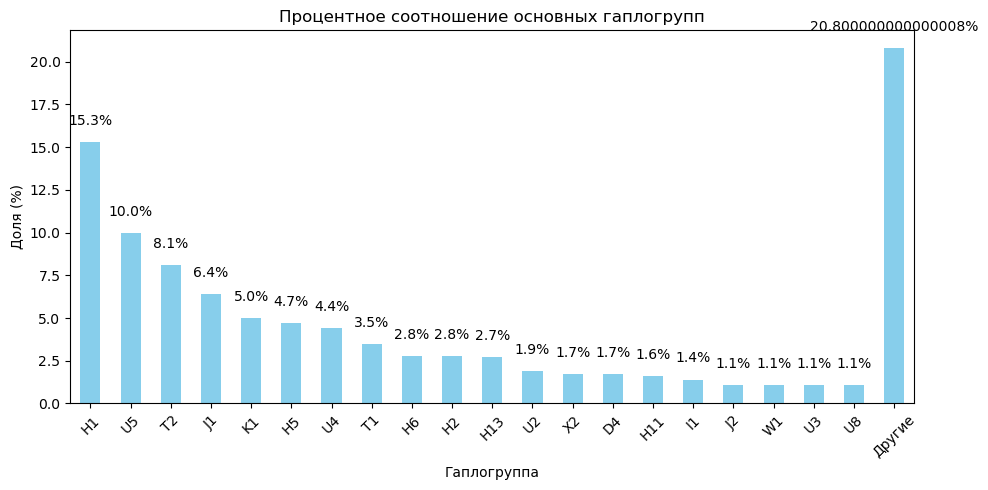

In [43]:
# Группируем по основным ветвям (например, "K1a" вместо "K1a12a")
df['Haplo_main'] = df['Haplogroup'].str.extract(r'^([A-Z]\d+)?[a-z]?')

# Считаем проценты
haplo_counts = df['Haplo_main'].value_counts(normalize=True).mul(100).round(1)

# Объединяем мелкие группы
top_10 = haplo_counts.head(20)
others = pd.Series({'Другие': haplo_counts[20:].sum()})
haplo_counts = pd.concat([top_10, others])

# График
plt.figure(figsize=(10, 5))
haplo_counts.plot(kind='bar', color='skyblue')
plt.title("Процентное соотношение основных гаплогрупп")
plt.xlabel("Гаплогруппа")
plt.ylabel("Доля (%)")
plt.xticks(rotation=45)
for i, v in enumerate(haplo_counts):
    plt.text(i, v + 1, f"{v}%", ha='center')
plt.tight_layout()
plt.show()

In [37]:
# Упрощаем названия (оставляем только первую часть, например "K1a" вместо "K1a12a")
df['Haplogroup_simple'] = df['Haplogroup'].str.extract(r'^([A-Z]\d+\w?)')  

# Считаем проценты для упрощённых групп
haplo_counts = df['Haplogroup_simple'].value_counts(normalize=True) * 100
haplo_counts = haplo_counts.head(10)

In [38]:
print(haplo_counts)

Haplogroup_simple
U5a    6.222707
J1c    4.585153
H1a    3.930131
H1c    3.930131
U5b    3.820961
T2b    3.711790
T1a    3.384279
H5a    3.275109
U4a    3.056769
H1b    2.729258
Name: proportion, dtype: float64


<Axes: >

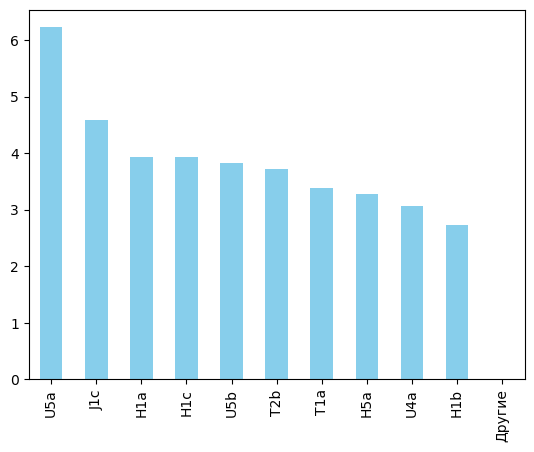

In [39]:
top_10 = haplo_counts.head(10)
others = pd.Series({'Другие': haplo_counts[10:].sum()})
haplo_counts = pd.concat([top_10, others])

# График
haplo_counts.plot(kind='bar', color='skyblue')

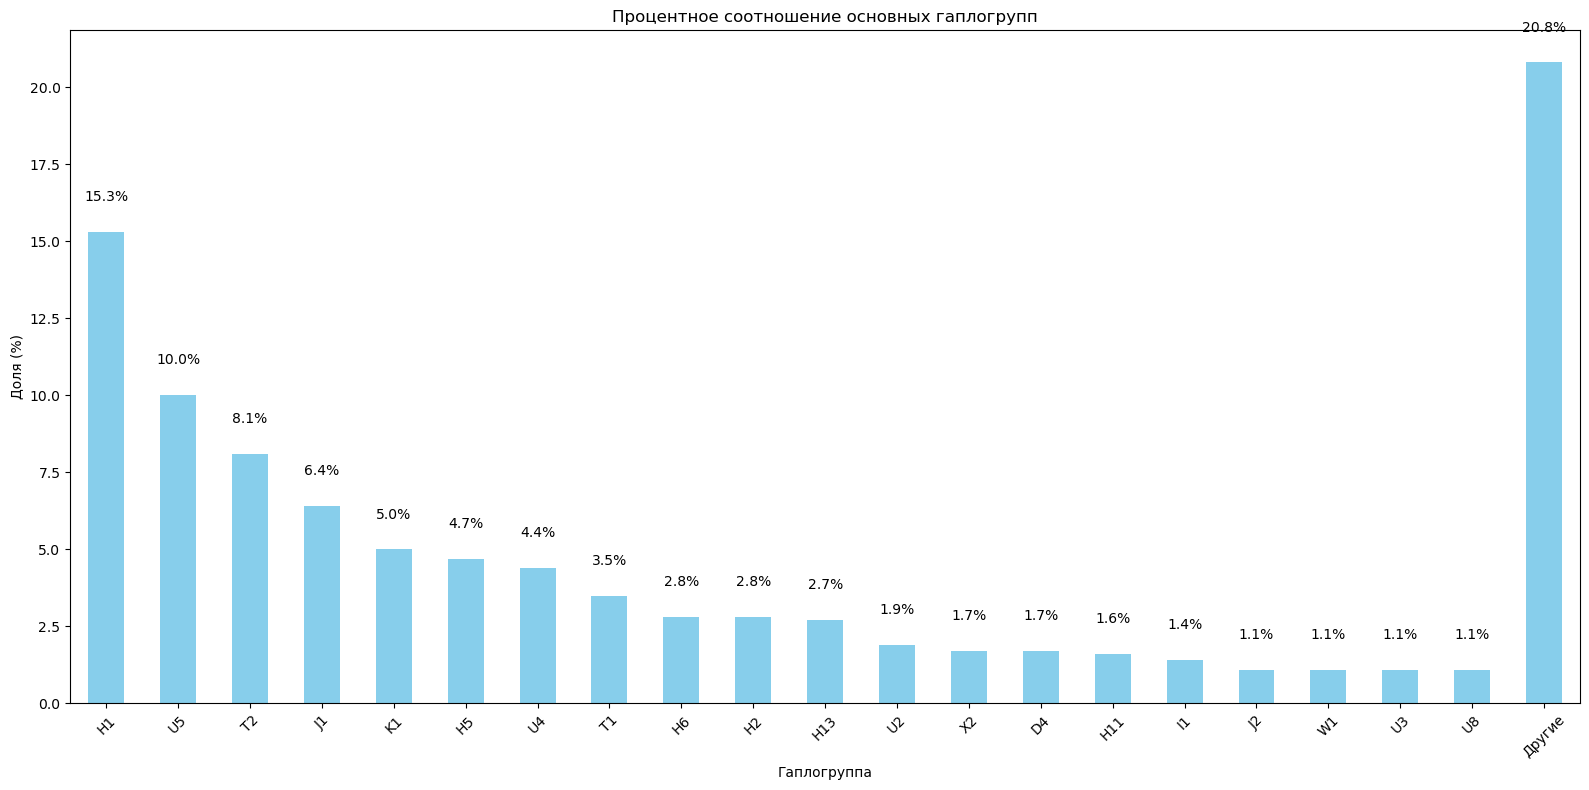

In [97]:
# Группируем по основным ветвям (например, "K1a" вместо "K1a12a")
df['Haplo_main'] = df['Haplogroup'].str.extract(r'^([A-Z]\d+)?[a-z]?')

# Считаем проценты
haplo_counts = df['Haplo_main'].value_counts(normalize=True).mul(100).round(1)

# Объединяем мелкие группы
top_10 = haplo_counts.head(20)
others = pd.Series({'Другие': haplo_counts[20:].sum().round(1)})
haplo_counts = pd.concat([top_10, others])

# График
plt.figure(figsize=(16, 8))
haplo_counts.plot(kind='bar', color='skyblue')
plt.title("Процентное соотношение основных гаплогрупп")
plt.xlabel("Гаплогруппа")
plt.ylabel("Доля (%)")
plt.xticks(rotation=45)
for i, v in enumerate(haplo_counts):
    plt.text(i, v + 1, f"{v}%", ha='center')
plt.tight_layout()
plt.show()

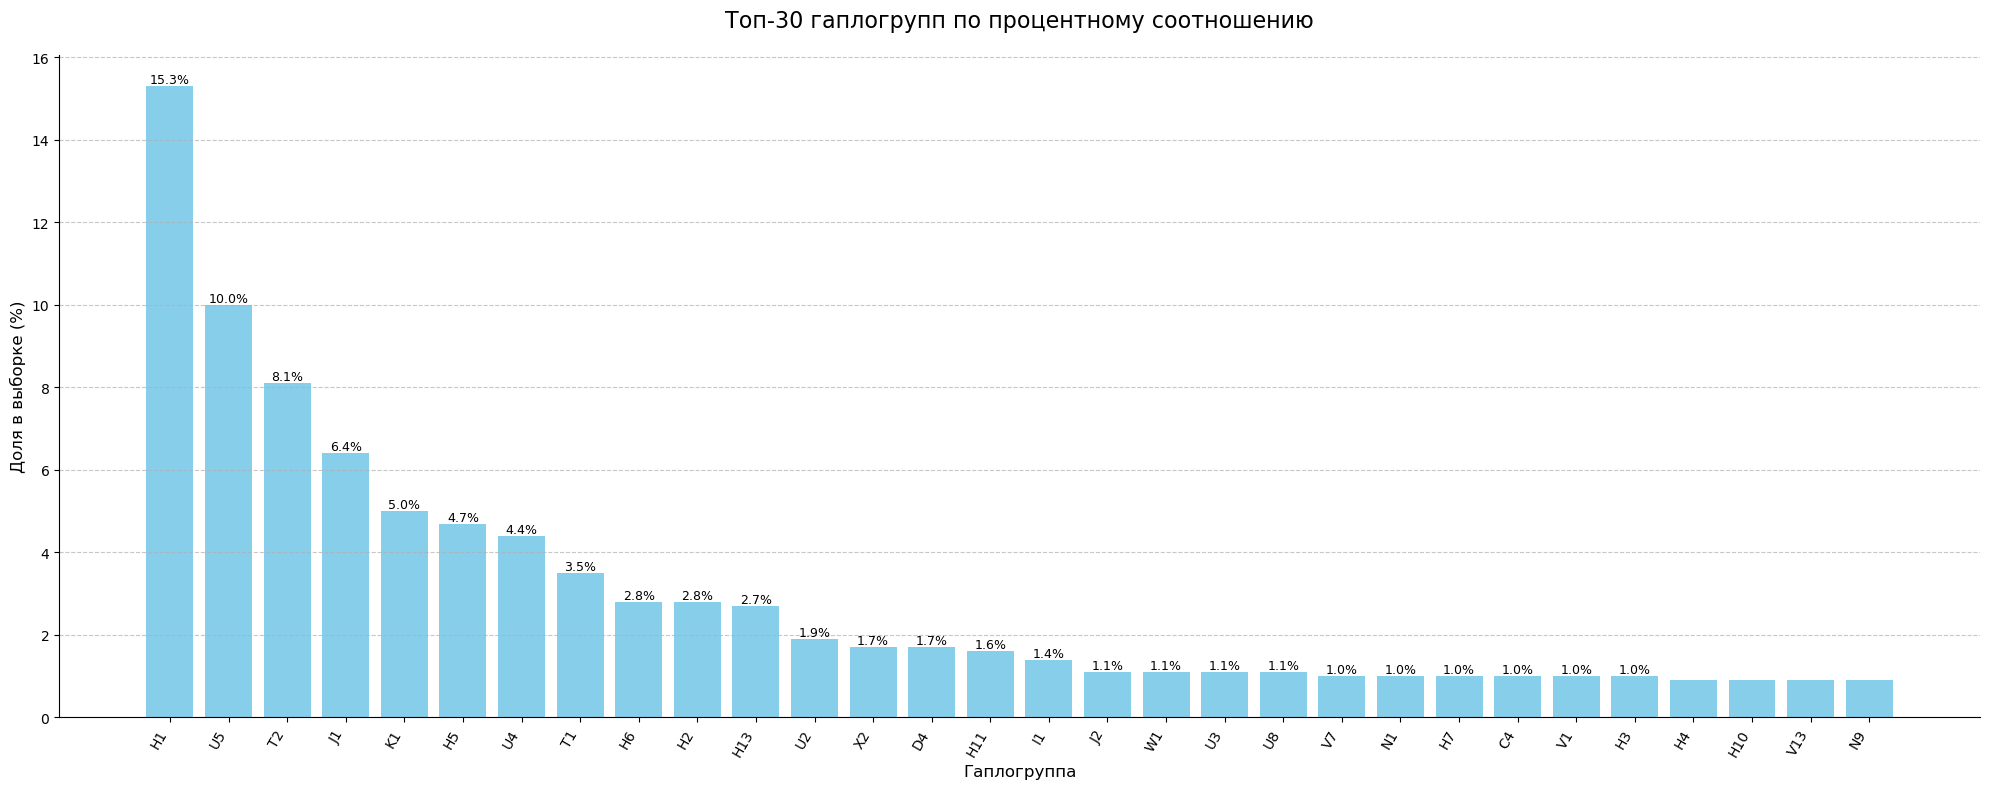

In [98]:
# Группируем по основным ветвям
df['Haplo_main'] = df['Haplogroup'].str.extract(r'^([A-Z]\d+)?[a-z]?')

# Считаем проценты и берём топ-30
haplo_counts = df['Haplo_main'].value_counts(normalize=True).mul(100).round(1)
top_30 = haplo_counts.head(20)

# Создаём фигуру с увеличенной шириной
plt.figure(figsize=(20, 8))  # Ширина 20 дюймов, высота 8

# Горизонтальная бар-плотина (чтоб подписи лучше читались)
bars = plt.bar(top_30.index, top_30.values, color='skyblue')

# Настройки внешнего вида
plt.title("Топ-30 гаплогрупп по процентному соотношению", fontsize=16, pad=20)
plt.xlabel("Гаплогруппа", fontsize=12)
plt.ylabel("Доля в выборке (%)", fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)  # Наклон 60 градусов
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Умные подписи - только для значимых значений
for bar in bars:
    height = bar.get_height()
    if height >= 1:  # Подписываем только значения >1%
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9)

# Автоматическая регулировка отступов
plt.tight_layout()

# Добавляем сетку и рамку
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

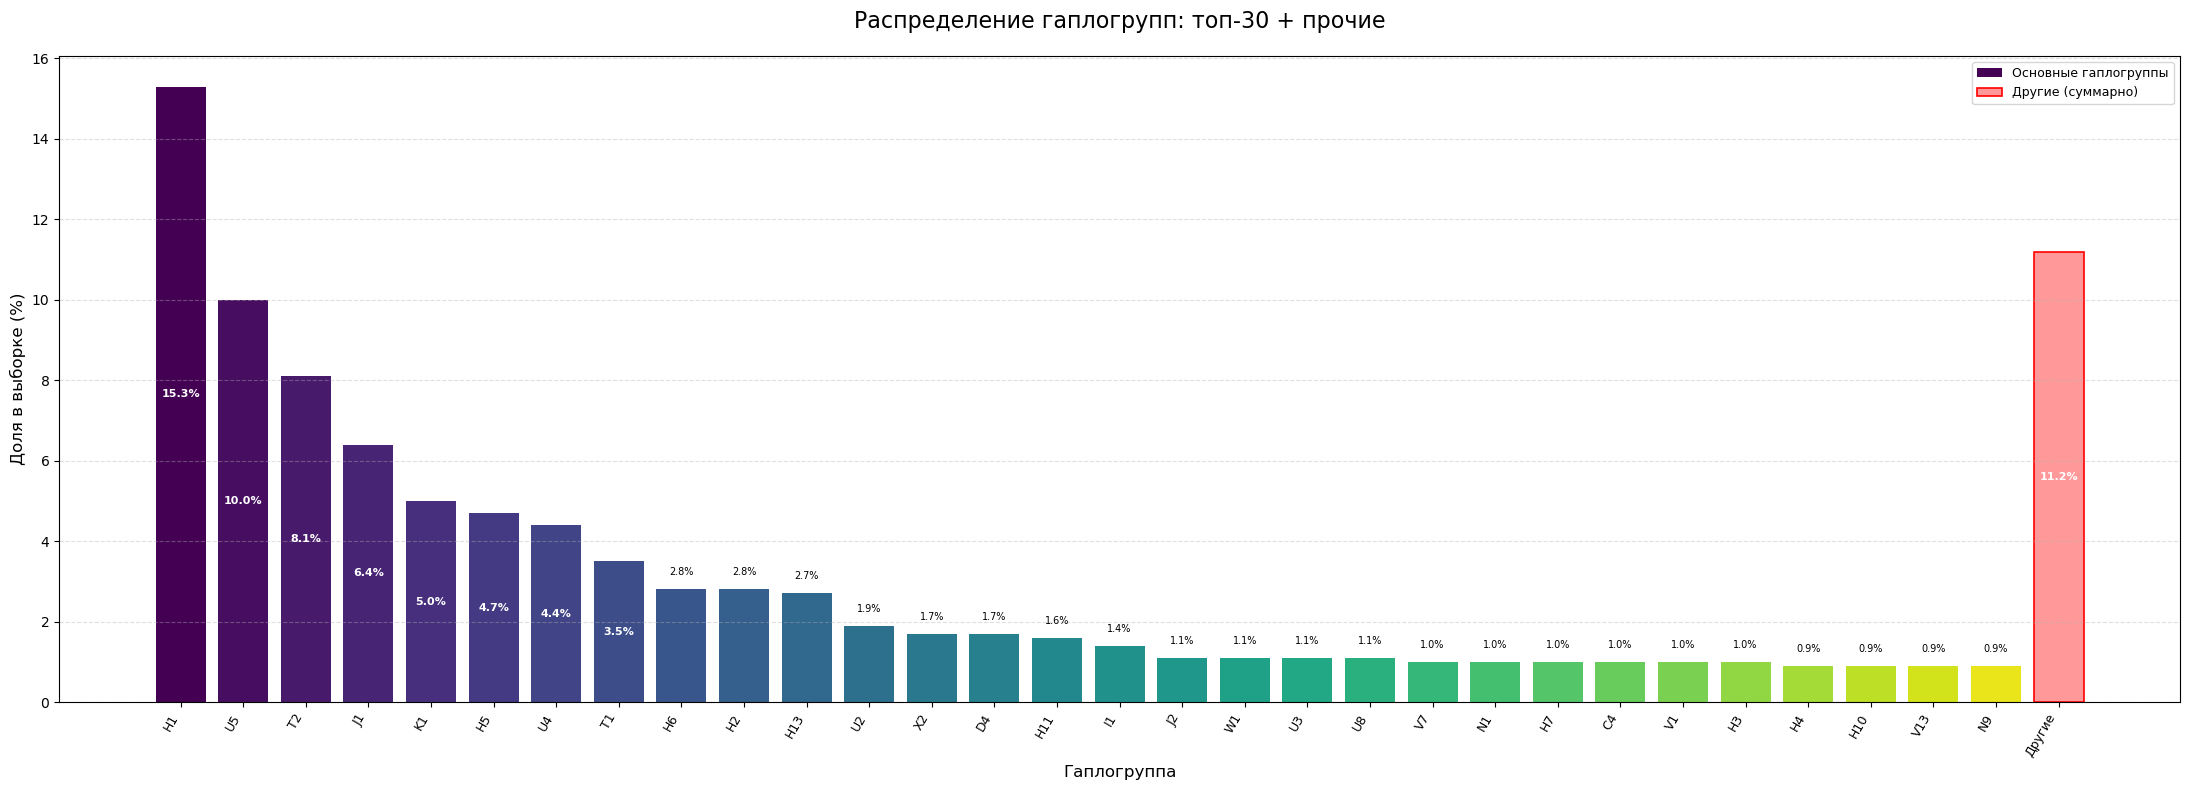

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Группируем по основным ветвям
df['Haplo_main'] = df['Haplogroup'].str.extract(r'^([A-Z]\d+)?[a-z]?')

# Считаем проценты
haplo_counts = df['Haplo_main'].value_counts(normalize=True).mul(100).round(1)

# Отделяем топ-30 и объединяем остальное в "Другие"
top_30 = haplo_counts.head(30)
others_sum = haplo_counts[30:].sum().round(1)
final_counts = pd.concat([top_30, pd.Series({'Другие': others_sum})])

# Создаём фигуру с увеличенной шириной и адаптивным расположением
plt.figure(figsize=(22, 8))

# Цветовая схема: топ-30 - градиент, "Другие" - отдельный цвет
colors = [plt.cm.viridis(i/30) for i in range(30)] + ['#FF9999']
bars = plt.bar(final_counts.index, final_counts.values, color=colors)

# Настройки внешнего вида
plt.title("Распределение гаплогрупп: топ-30 + прочие", fontsize=16, pad=20)
plt.xlabel("Гаплогруппа", fontsize=12)
plt.ylabel("Доля в выборке (%)", fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=9)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Динамические подписи:
# - Для топ-10 - внутри столбцов
# - Для остальных - сверху с уменьшенным шрифтом
for idx, bar in enumerate(bars):
    height = bar.get_height()
    if height > 3:  # Крупные значения внутри столбца
        plt.text(bar.get_x() + bar.get_width()/2, height/2,
                f'{height:.1f}%',
                ha='center', va='center', color='white', fontsize=8, fontweight='bold')
    else:  # Мелкие значения сверху
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.3,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=7)

# Особое выделение группы "Другие"
bars[-1].set_edgecolor('red')
bars[-1].set_linewidth(1.2)

# Легенда для пояснения
plt.legend([bars[0], bars[-1]], ['Основные гаплогруппы', 'Другие (суммарно)'],
           loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

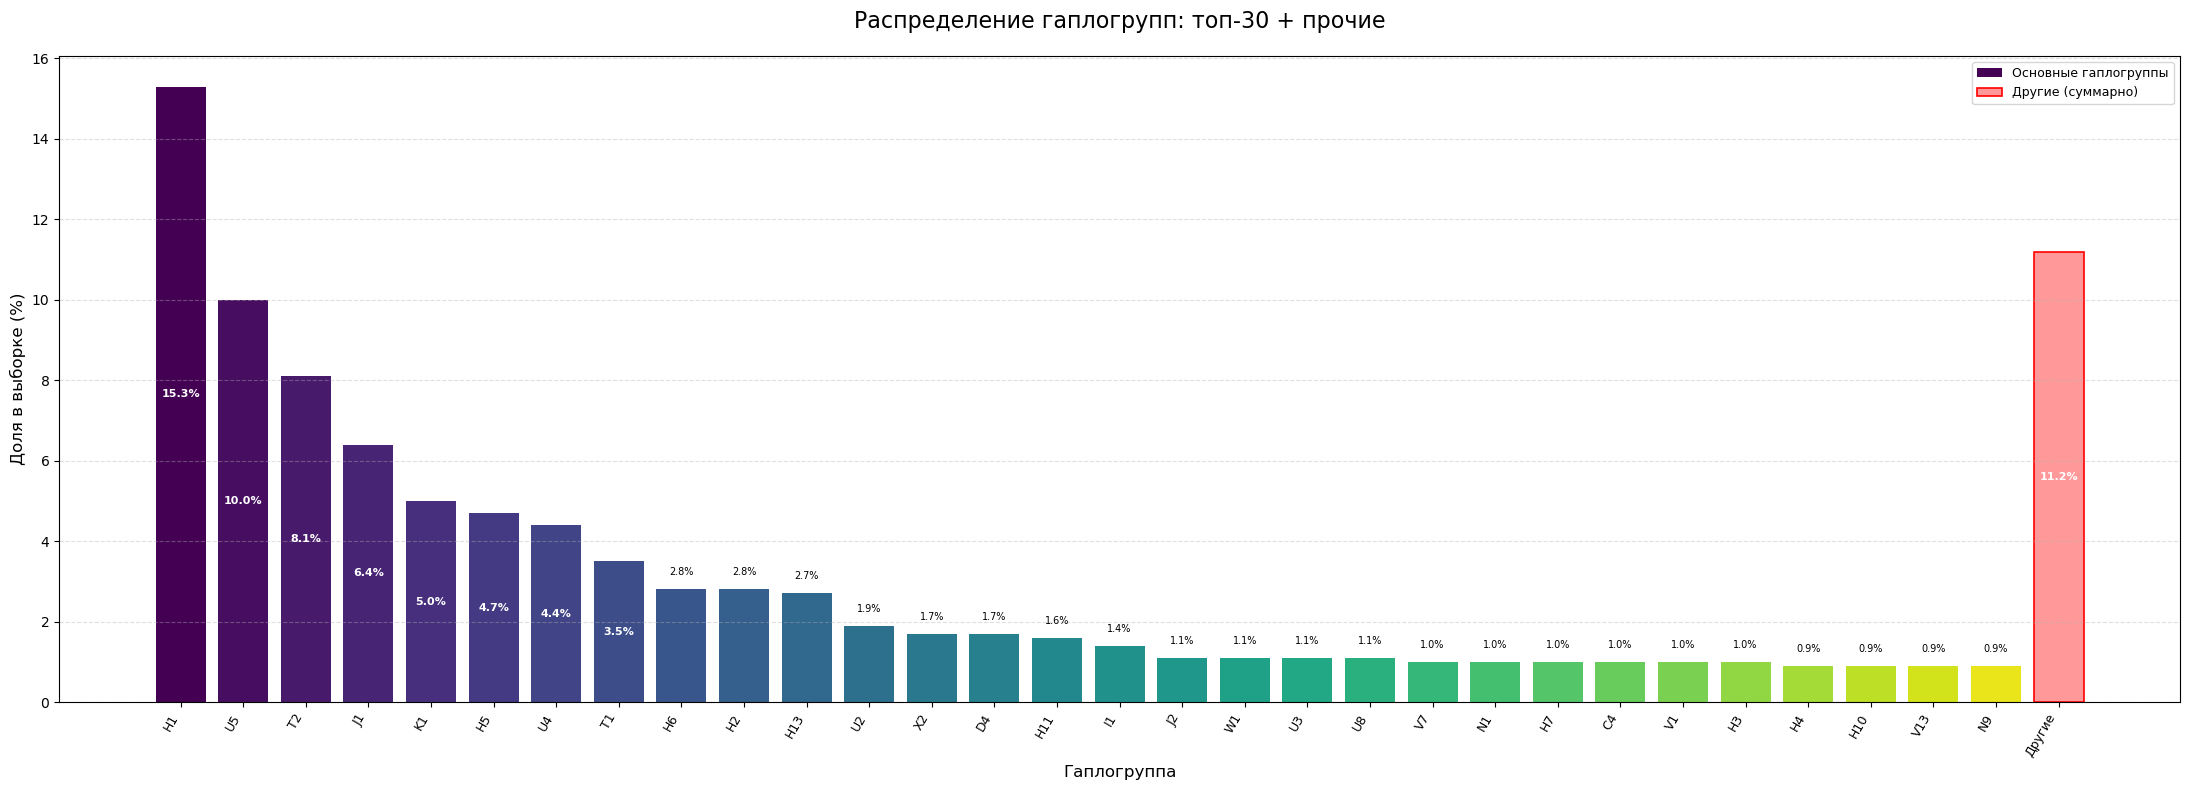

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Группируем по основным ветвям
df['Haplo_main'] = df['Haplogroup'].str.extract(r'^([A-Z]\d+)?[a-z]?')

# Считаем проценты
haplo_counts = df['Haplo_main'].value_counts(normalize=True).mul(100).round(1)

# Отделяем топ-30 и объединяем остальное в "Другие"
top_30 = haplo_counts.head(30)
others_sum = haplo_counts[30:].sum().round(1)
final_counts = pd.concat([top_30, pd.Series({'Другие': others_sum})])

# Создаём фигуру с увеличенной шириной и адаптивным расположением
plt.figure(figsize=(22, 8))

# Цветовая схема: топ-30 - градиент, "Другие" - отдельный цвет
colors = [plt.cm.viridis(i/30) for i in range(30)] + ['#FF9999']
bars = plt.bar(final_counts.index, final_counts.values, color=colors)

# Настройки внешнего вида
plt.title("Распределение гаплогрупп: топ-30 + прочие", fontsize=16, pad=20)
plt.xlabel("Гаплогруппа", fontsize=12)
plt.ylabel("Доля в выборке (%)", fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=9)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Динамические подписи:
# - Для топ-10 - внутри столбцов
# - Для остальных - сверху с уменьшенным шрифтом
for idx, bar in enumerate(bars):
    height = bar.get_height()
    if height > 3:  # Крупные значения внутри столбца
        plt.text(bar.get_x() + bar.get_width()/2, height/2,
                f'{height:.1f}%',
                ha='center', va='center', color='white', fontsize=8, fontweight='bold')
    else:  # Мелкие значения сверху
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.3,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=7)

# Особое выделение группы "Другие"
bars[-1].set_edgecolor('red')
bars[-1].set_linewidth(1.2)

# Легенда для пояснения
plt.legend([bars[0], bars[-1]], ['Основные гаплогруппы', 'Другие (суммарно)'],
           loc='upper right', fontsize=9)

plt.tight_layout()
# 3. PNG (растровый - для презентаций)
output_filename = '/home/julia/thesis/plot'
plt.savefig(f"{output_filename}.png", 
           format='png', 
           dpi=600,                      # Ультравысокое разрешение
           facecolor='white',            # Белый фон вместо прозрачного
           bbox_inches='tight',          # Обрезка пустых полей
           transparent=False)